FEUILLE DE TP 5

---
# Polynôme interpolateur de Lagrange (Partie 2)
---

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt  # librairie graphique
import numpy as np  # pour les numpy array

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction en utilisant la base duale des polynômes de Lagrange

Nous rappelons que les polynômes de Lagrange associés aux points $x_1,\ldots,x_N$ sont définis par
$$
L_i = \prod_{j\neq i} \frac{X-x_j}{x_i-x_j}, \qquad 1\leq i\leq N.
$$
Le polynôme interpolateur de Lagrange s'exprime alors dans la base des polynômes de Lagrange 
$$
P = \sum_{i=1}^N y_i L_i.
$$

**Question**

> Proposez une fonction `interp_Lagrange` qui
> * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
> * retourne l'évaluation du polynôme interpolateur aux points du vecteur `xx` en utilisant la décomposition dans la base des polynômes de Lagrange.
> Testez votre nouvelle fonction en reprenant le test fait avec la méthode de Vandermonde.

In [9]:
def interp_Lagrange(x, y, xx):
    N = len(x)
    M = len(xx)
    L = np.ones((M, N))

    for i in range(N):
        for j in range(N):
            if i != j:
                L[:, i] *= (xx - x[j]) / (x[i] - x[j])
    return L.dot(y)

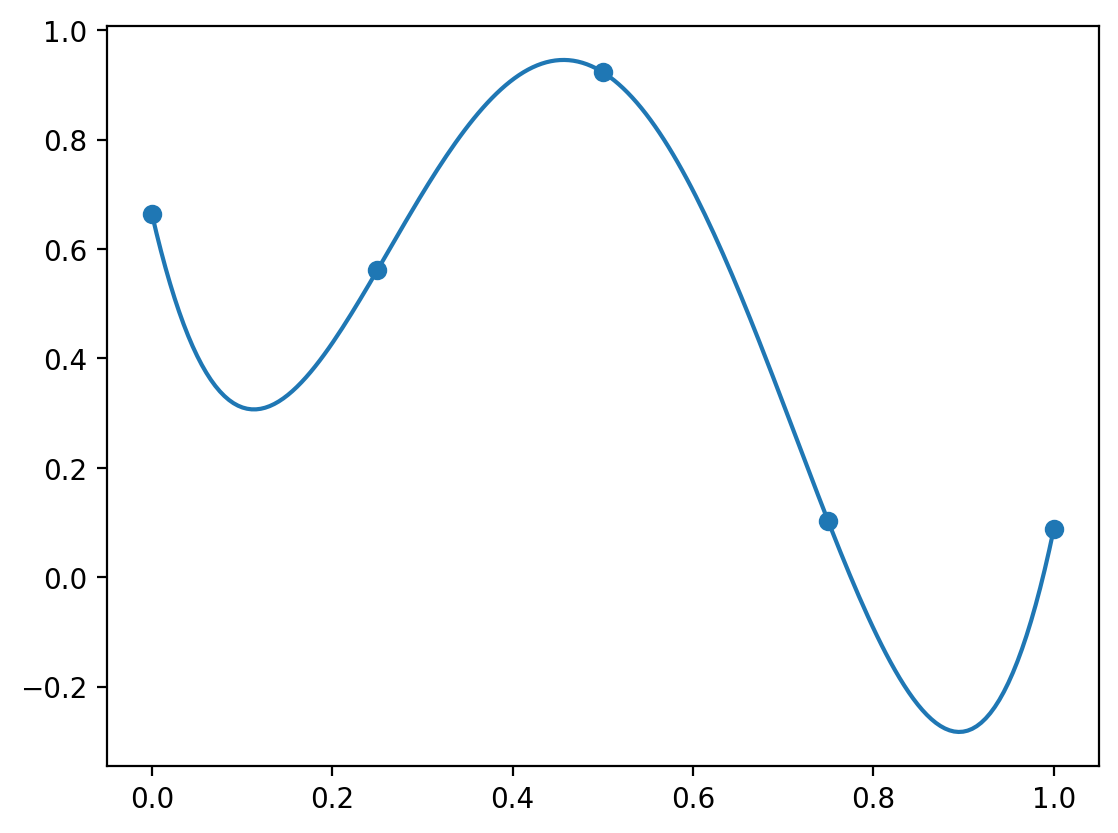

In [16]:
N = 5
x = np.linspace(0, 1, 5)
y = np.random.rand(N)
xx = np.linspace(0, 1, 200)

plt.scatter(x, y)
plt.plot(xx, interp_Lagrange(x, y, xx))

## Le choix des points d'interpolation

Etant donné un intervalle $[a, b]$, nous rappelons la définition des familles de points classiques pour l'interpolation :
* les points équi-répartis
$$ x_{i, N} = a + (b-a) \frac{i-1}{N-1}, \qquad 1\leq i\leq N,$$
* les points de Tchebychev
$$ x_{i, N} = \frac{a+b}{2} + \frac{b-a}{2} \cos \Bigl( \frac{2i-1}{2N}\pi \Bigr), \qquad 1\leq i\leq N,$$

**Question 1**

> 1. Proposez une fonction `equirepartis(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle $a$ et $b$ et 1 entier $N$ et qui retourne la famille des $N$ points équi-répartis entre $a$ et $b$.
> 2. Proposez une fonction `tchebychev(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle $a$ et $b$ et 1 entier $N$ et qui retourne la famille des $N$ points de Tchebychev entre $a$ et $b$. 

In [28]:
def equirepartis(a, b, N):
    return np.array([a + (b - a) * (i - 1) / (N - 1) for i in range(1, N + 1)])


def tchebychev(a, b, N):
    return np.array(
        [
            (a + b) / 2 + (b - a) / 2 * np.cos((2 * i - 1) / (2 * N) * np.pi)
            for i in range(1, N + 1)
        ]
    )

**Question 2**

> 1. Proposez une fonction `Li(i, x, xx)` qui prend en arguments un entier $i$ et deux vecteurs $x$ et $xx$ et qui retourne (si c'est possible) l'évaluation du polynôme $L_i$ aux points $xx$ avec pour rappel
$$ L_i(X) = \prod_{j\neq i} \frac{X-x_j}{x_i-x_j}.$$
> 2. Tracez dans des fenêtres graphiques séparés l'allure des différents polynômes pour les points équi-répartis et les points de Tchebychev (pour différentes valeurs de $N$). Vous pouvez essayer d'obtenir une figure ressemblant à celle-ci.
> 3. Que remarquez-vous ?

![polynomesLi](TP05_Li.png)

In [90]:
def Li(i, x, xx):
    N = len(x)
    L = np.ones_like(xx)
    for j in range(N):
        if i != j:
            L *= (xx - x[j]) / (x[i] - x[j])
    return L

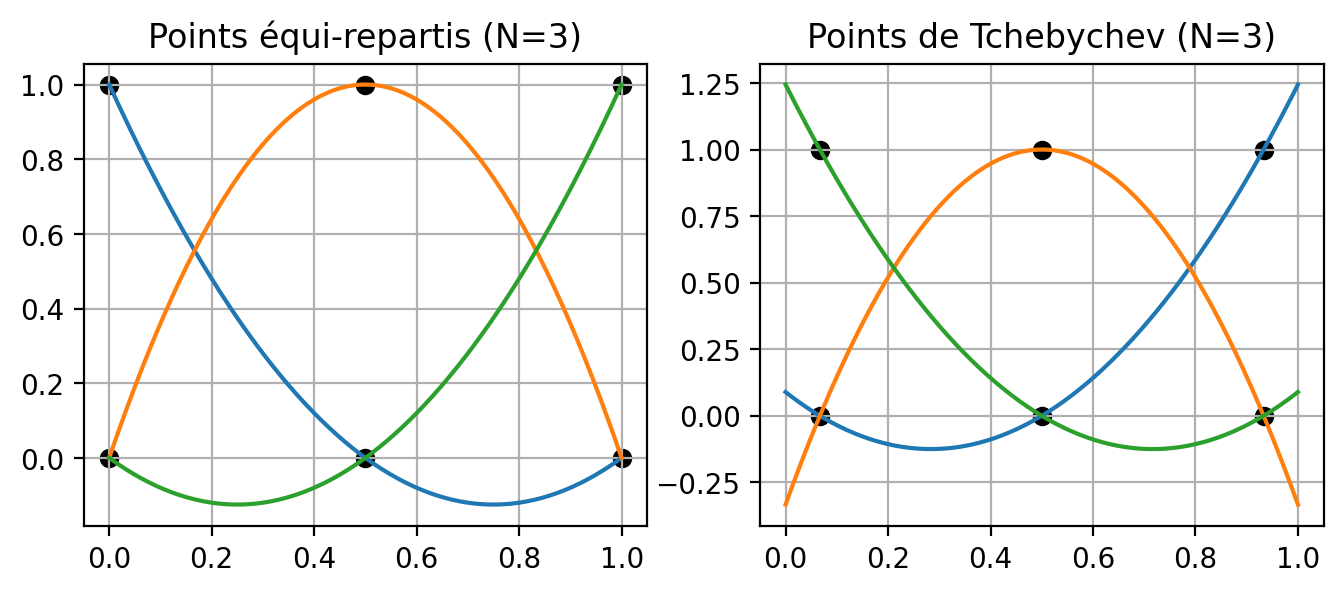

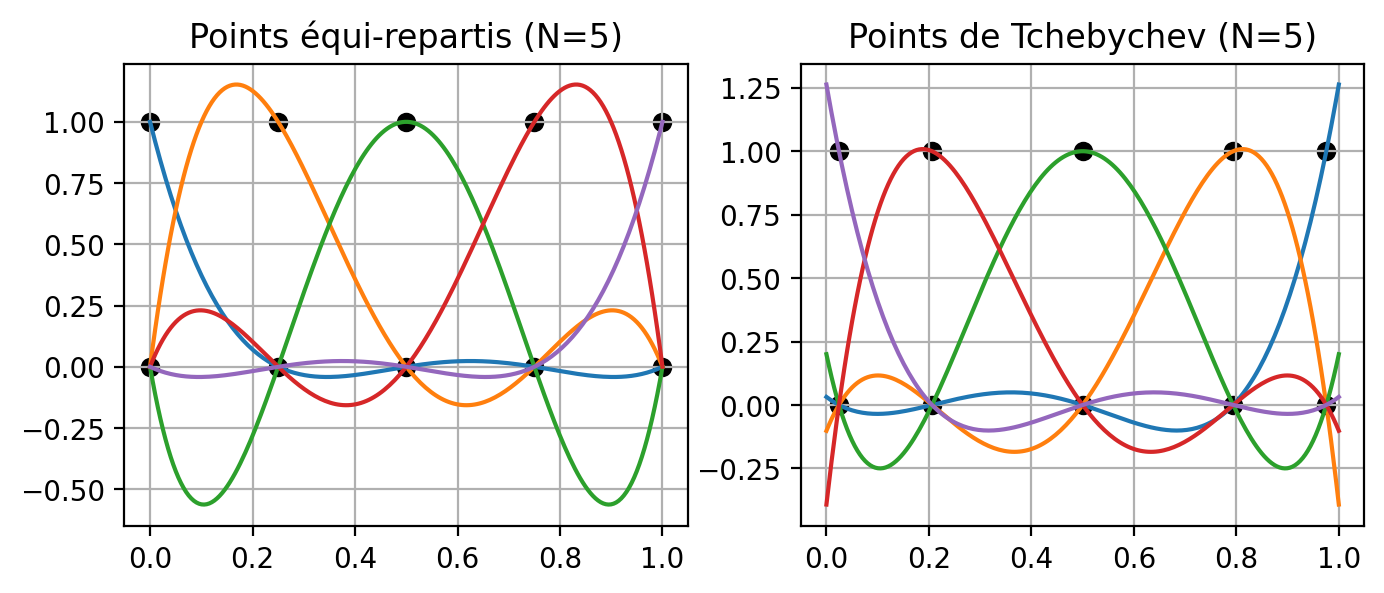

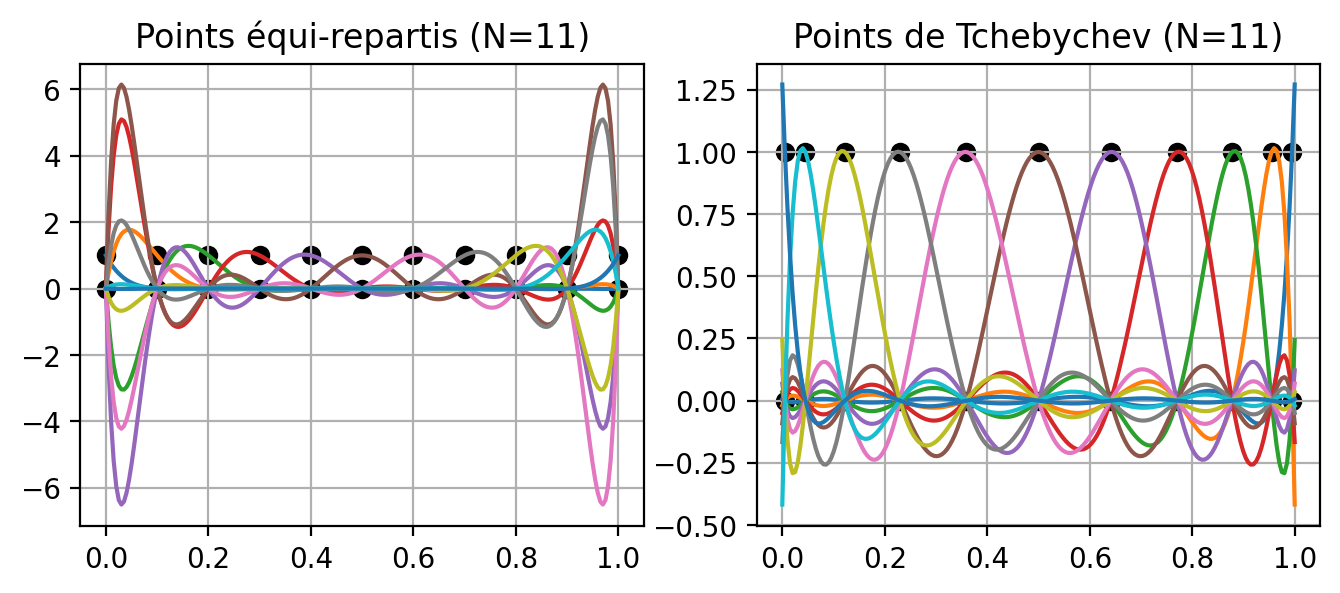

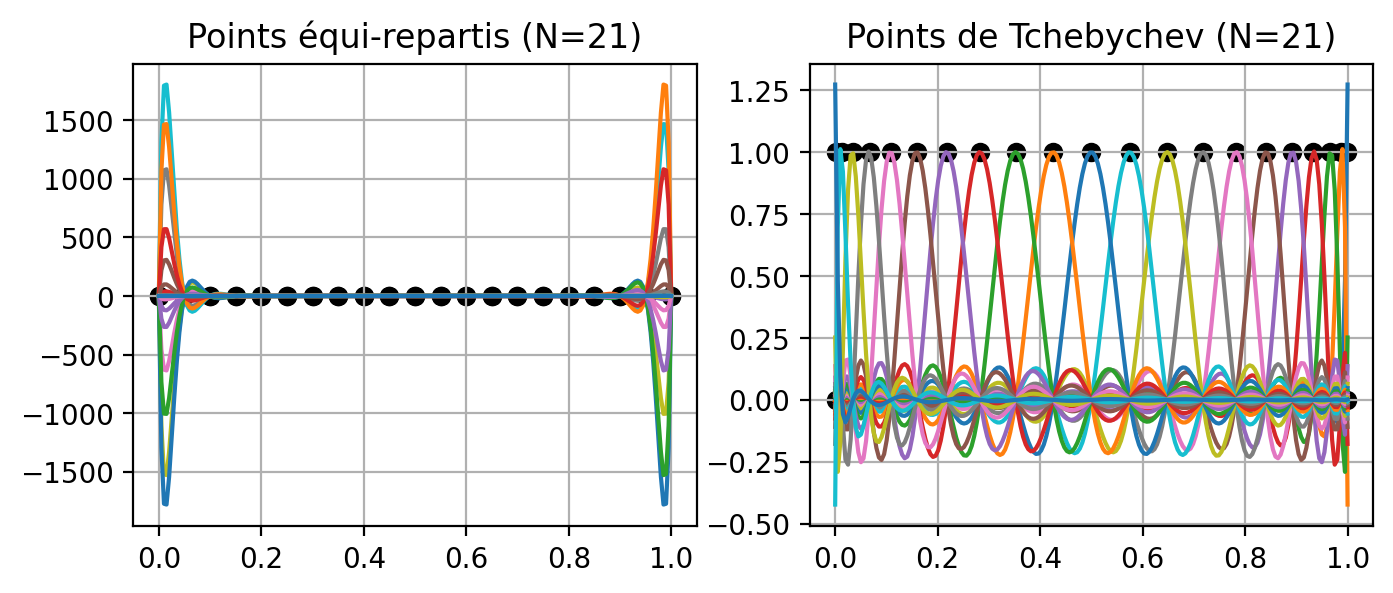

In [94]:
N = [3, 5, 11, 21]
a, b = 0, 1

xx = np.linspace(a, b, 200)

for n in N:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax[0].set_title(f"Points équi-repartis (N={n})")
    xeq = equirepartis(a, b, n)
    for i in range(n):
        ax[0].scatter(xeq[i], 0, color="black")
        ax[0].scatter(xeq[i], 1, color="black")
        ax[0].plot(xx, Li(i, xeq, xx))
    ax[0].grid()

    ax[1].set_title(f"Points de Tchebychev (N={n})")
    xchev = tchebychev(a, b, n)
    for i in range(n):
        ax[1].scatter(xchev[i], 0, color="black")
        ax[1].scatter(xchev[i], 1, color="black")
        ax[1].plot(xx, Li(i, xchev, xx))
    ax[1].grid()

**Question 3**

Afin de visualiser la convergence ou la non convergence du polynôme interpolateur vers une fonction régulière, nous choisissons de prendre la fonction $f$ définie sur $[-5, 5]$ par
$$f(x) = \frac{1}{1+x^2}.$$

> 1. Tracez dans une même fenêtre graphique
>    - la fonction $f$
>    - les polynômes interpolateurs de Lagrange pour $N$ points équi-répartis avec $N\in\lbrace 5, 10, 20 \rbrace$. Ajoutez un titre et une légende.
> 2. Recommencez la question précédente avec des points de Tchebychev.
> 3. Que remarquez-vous ?

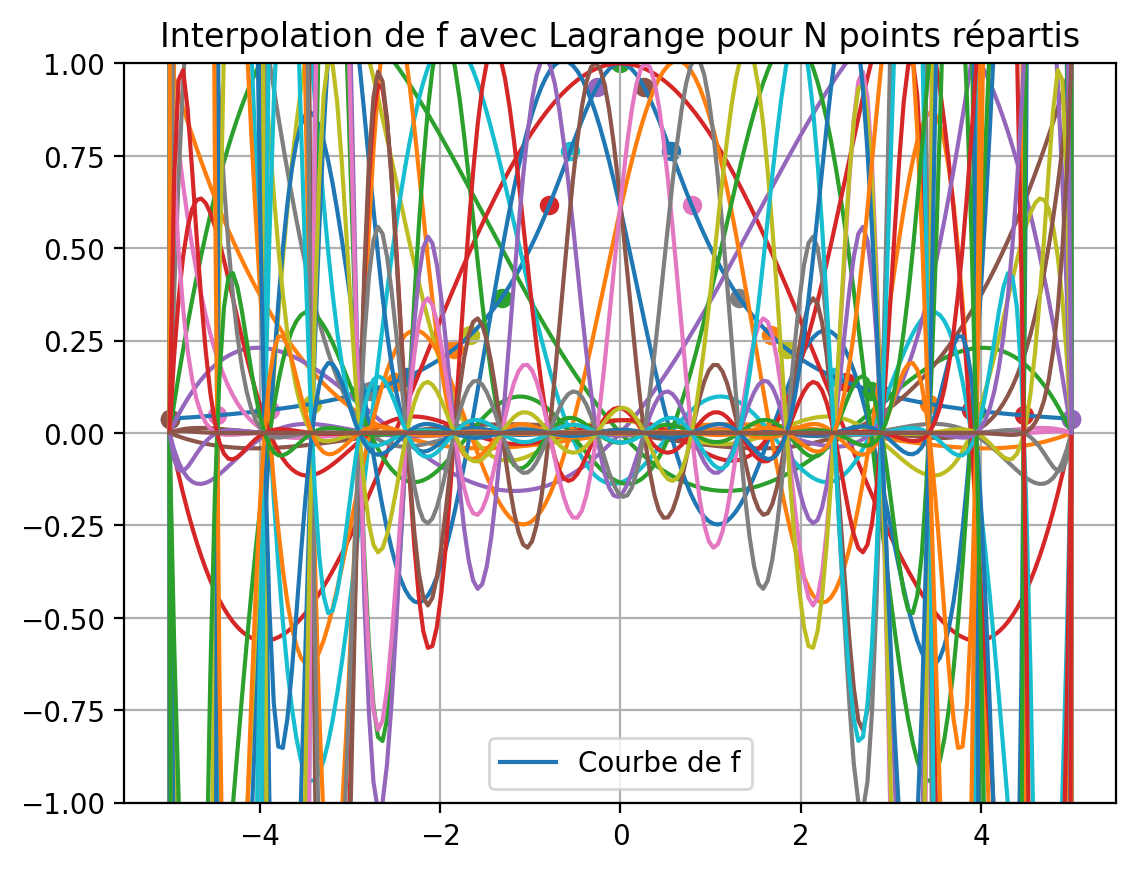

In [124]:
def f(x):
    return 1 / (1 + x**2)
a, b = -5, 5
xx = np.linspace(a, b, 200)

plt.plot(xx, f(xx), label="Courbe de f")
for n in [5, 10, 20]:
    xeq = equirepartis(a, b, n)
    for i in range(n):
        plt.scatter(xeq[i], f(xeq[i]))
        plt.plot(xx, Li(i, xeq, xx))

plt.ylim(-1, 1)
plt.legend()
plt.title("Interpolation de f avec Lagrange pour N points répartis")
plt.grid()

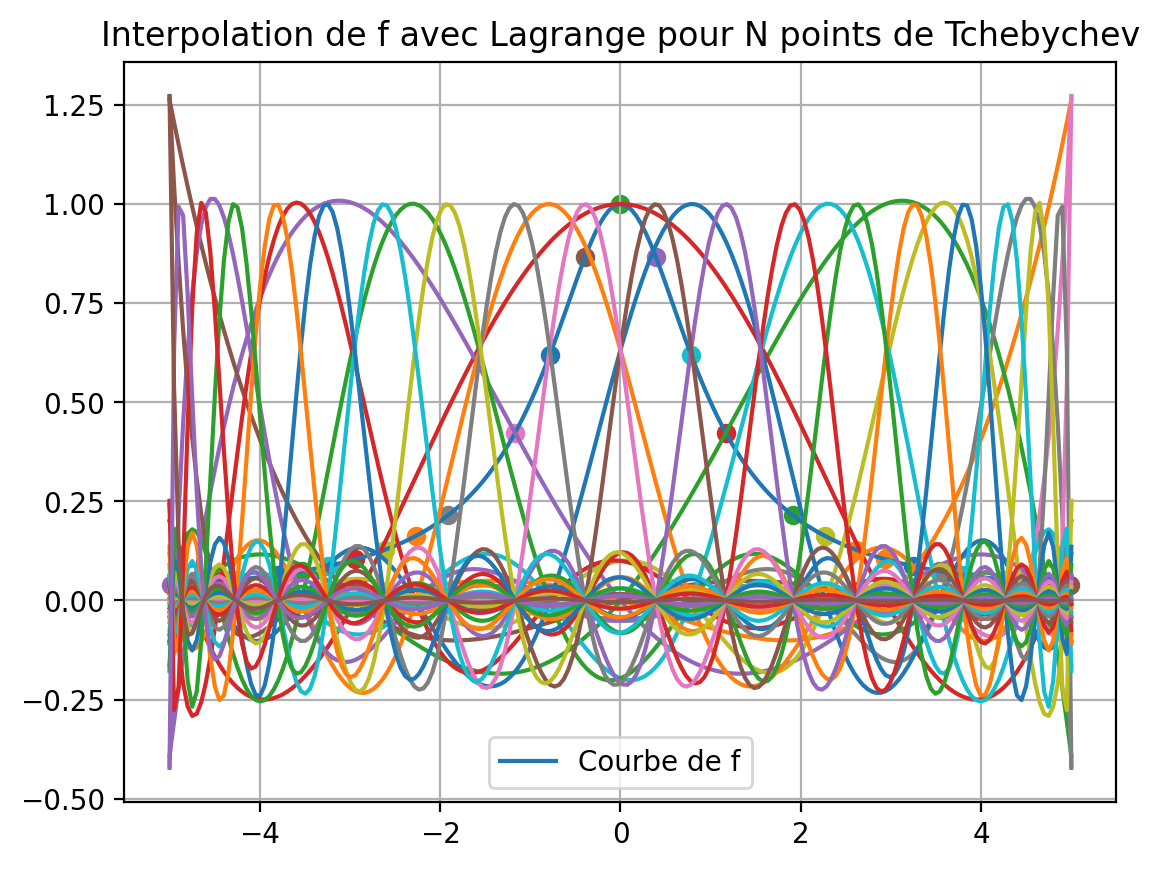

In [125]:
def f(x):
    return 1 / (1 + x**2)
a, b = -5, 5
xx = np.linspace(a, b, 200)

plt.plot(xx, f(xx), label="Courbe de f")

for n in [5, 10, 20]:
    xchev = tchebychev(a, b, n)
    for i in range(n):
        plt.scatter(xchev[i], f(xchev[i]))
        plt.plot(xx, Li(i, xchev, xx))

plt.legend()
plt.title("Interpolation de f avec Lagrange pour N points de Tchebychev")
plt.grid()

**Question 4**

Pour mesurer l'écart entre la fonction $f$ et un polynôme interpolateur $P$, nous choisissons la norme infinie.

> 1. Tracez dans une fenêtre graphique la norme infinie de la différence entre la fonction et son polynôme interpolateur à $N$ points équi-répartis en fonction de $N$. Vous prendrez $N$ entre $5$ et $100$ par pas de $5$ et vous choisirez une échelle logarithmique pour les ordonnées.
> 2. Ajoutez sur la même figure la courbe obtenue pour les points de Techbychev.
> 3. Que remarquez-vous ?

ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

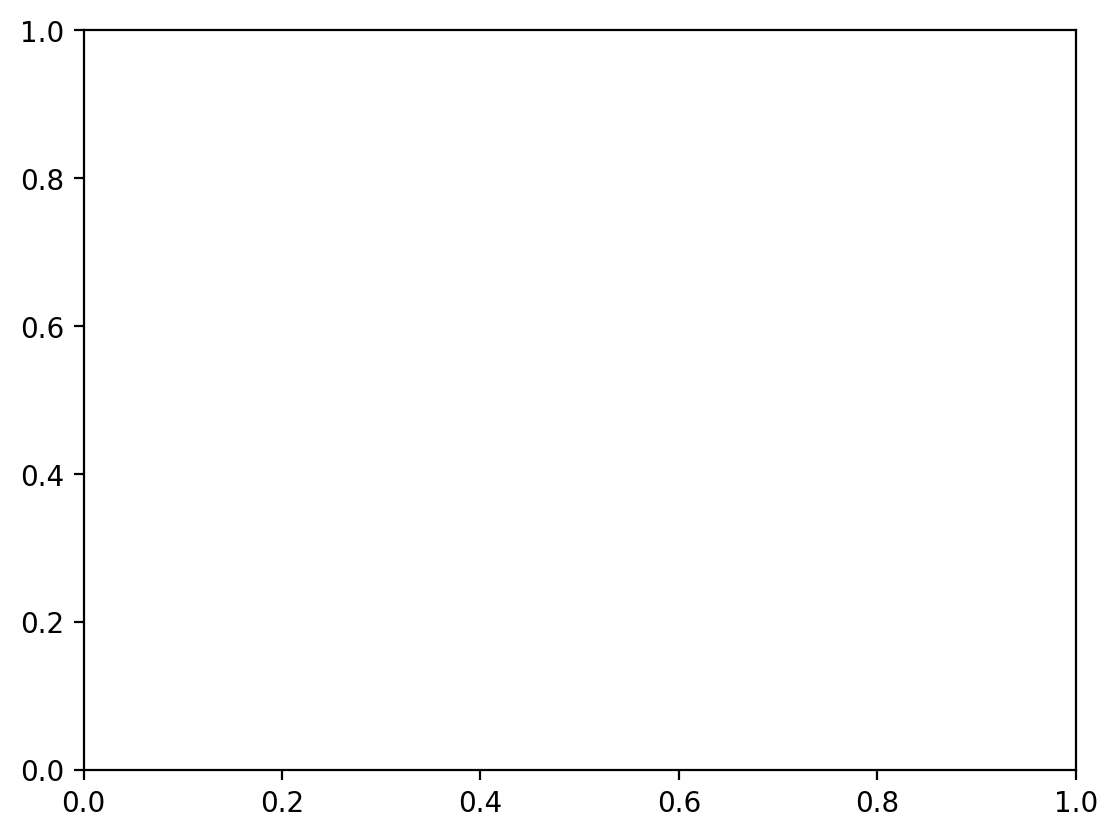

In [140]:
N = np.arange(5, 101, 5)


def n_inf(f, p):
    return np.max([f, p])


# Norme inf en fct de N
for n in N:
    xeq = equirepartis(a, b, n)
    for i in range(n):
        plt.plot(xx, n_inf(f(xx), Li(i, xeq, xx)))